# Using K-Nearest Neigbors with Company Bankruptcy By Vinny
Welcome to the Jupyter Notebook on K Nearest Neighbors! We will be using a dataset for bankruptcy prediction related to US public companies listed on the New York Stock Exchange and NASDAQ.

- **Author:** Vincenzo Bean
- **Affiliation:** Milwaukee School of Engineering  
- **Email:** beanv@msoe.edu
- **Date:** 12/13/2024

### All Necessary Imports
The cell below runs a list of all the neccessary imports needed in order to run the code on this Jupyter Notebook as follows:

In [1]:
# Imports go here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import zscore

## 1 | Data Collection
---
The data that me and my partner are using is a dataset that shows different companies financial data and if they went bankrupt or not. This data came from kaggle and is mostly mostly numeric, with the status label being catagorical. There is also a column for the Company name, but this was not useful for the overall process.

## 2 | Research Question & Hypothesis
---
How well can a KNN accuratly predict if a company will go bankrupt using only the current assests and the net sales of the company. I believe that a KNN with a K of 5 and a distance measurement of euclidean will achieve at least 90% accuracy when evaluating the overall accuracy.

## 3 | Data Preprocessing
---
Overall most of the data is numeric, and there are only 2 columns that are text based, and one that is catagorical data. The two text columns are the company name and year, and the catagorical feature is the status_label.

There are no null values, so there is no need no do anything to replace them. We will use a box plot on the dataframe to she the amount of outliers on either side, and to fix the outliers We will use the Z-score standardization approach.

We will also do One-Hot encoding on the status_label so that the KNN can read the status label

## 4 | Experiment Design
---
We will split the data for the KNN using the train test split method, which uses the holdout method of data splitting.
We will perform hyperparameter tuning by using a different range of k values and ploting them with their accuracies. We will do two graphs, one with euclidian distance, and one with cosine to decide the distance parameter. We will evaluate the accuracy of the model using the overall accuracy, since it is a good metric to judge the model, however The bigger class will have to be undersampled so that the class imbalance problem is fixed.

## 5 | Data Preprocessing
---

### Loading the Dataset, Checking Null Values & Outliers
We start off by loading up the dataset and convert it into a dataframe. We then move on to renaming the columns and use `.head()` to view the dataframe. Next, we use `.info()` to check for any null values and check for any outliers. For this experiment, we are only concerned about the current assets of the company and the net sales made by the company.

In [2]:
# loading the data
df = pd.read_csv("american_bankruptcy.csv")
new_cols = {"X1":"Current_assets", 'X2': 'Cost_of_goods_sold', 'X3':'Depreciation_and_Amortization', 'X4': 'Financial_Performance', 'X5': 'Inventory', 'X6':'Net_Income','X7':'Total_Receivables','X8':'Market_Values','X9':'Net_Sales','X10':'Total_Assets','X11':'Total_longTerm_Debt','X12':'EBIT','X13':'Gross_profit','X14':'Current_Liabilities', 'X15':'Retained_Earnings','X16':'Total_Revenue','X17':'Total_Liabilities','X18':'Operation_Costs'}
df.rename(columns = new_cols, inplace=True)
df.head()

,company_name,status_label,year,Current_assets,Cost_of_goods_sold,Depreciation_and_Amortization,Financial_Performance,Inventory,Net_Income,Total_Receivables,...,Net_Sales,Total_Assets,Total_longTerm_Debt,EBIT,Gross_profit,Current_Liabilities,Retained_Earnings,Total_Revenue,Total_Liabilities,Operation_Costs
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [3]:
# check for any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_name                   78682 non-null  object 
 1   status_label                   78682 non-null  object 
 2   year                           78682 non-null  int64  
 3   Current_assets                 78682 non-null  float64
 4   Cost_of_goods_sold             78682 non-null  float64
 5   Depreciation_and_Amortization  78682 non-null  float64
 6   Financial_Performance          78682 non-null  float64
 7   Inventory                      78682 non-null  float64
 8   Net_Income                     78682 non-null  float64
 9   Total_Receivables              78682 non-null  float64
 10  Market_Values                  78682 non-null  float64
 11  Net_Sales                      78682 non-null  float64
 12  Total_Assets                   78682 non-null 

<Axes: >

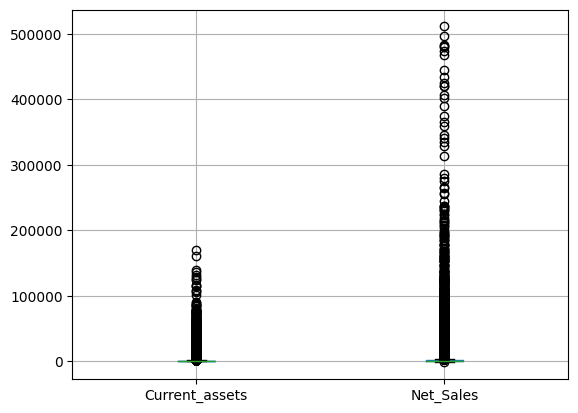

In [4]:
# checking for outliers in the selected data for experimentation
num_df = df[['Current_assets','Net_Sales']]
num_df.head()
num_df.boxplot()

### Standardizing the Data & One Hot Encoding
Next, we standardize the dataframe and perform one-hot encoding on the `status_label` column. We split the data into two dataframes, one for companies that are still alive, and another for companies that have failed.

In [5]:
# standardizing the data
num_df = num_df.apply(zscore)
num_df.head()

,Current_assets,Net_Sales
0,-0.093952,-0.112108
1,-0.100421,-0.124667
2,-0.112944,-0.144377
3,-0.123188,-0.147087
4,-0.114078,-0.143269


In [6]:
# grab the labels and do one-hot-encoding
labels = df['status_label'].apply(lambda x: 1 if x == 'alive' else (0 if x =='failed' else x))
labels.value_counts()

status_label
1    73462
0     5220
Name: count, dtype: int64

In [7]:
# viewing the labels columns
num_df['labels'] = labels
num_df.head()

,Current_assets,Net_Sales,labels
0,-0.093952,-0.112108,1
1,-0.100421,-0.124667,1
2,-0.112944,-0.144377,1
3,-0.123188,-0.147087,1
4,-0.114078,-0.143269,1


In [8]:
# grab training data with the alive label
alive_df = num_df[num_df['labels'] == 1]
print(alive_df.head())
failed_df = num_df[num_df['labels'] == 0]
failed_df.head()

   Current_assets  Net_Sales  labels
0       -0.093952  -0.112108       1
1       -0.100421  -0.124667       1
2       -0.112944  -0.144377       1
3       -0.123188  -0.147087       1
4       -0.114078  -0.143269       1


,Current_assets,Net_Sales,labels
50,0.902024,1.285857,0
51,1.094207,1.450962,0
52,1.440647,1.389037,0
53,1.032607,1.249790,0
54,0.967697,1.261589,0


In [9]:
# checking the size of both the dataframes
print(alive_df.size)
print(failed_df.size)

220386
15660


In [10]:
# combining the two dataframes together
alive_labels_df = num_df.sample(n = failed_df.size)
alive_labels_df.head()
final_df = pd.concat([alive_labels_df, failed_df], ignore_index = True)
final_df.head()

,Current_assets,Net_Sales,labels
0,0.211054,0.210598,1
1,-0.220432,-0.194059,0
2,-0.216160,-0.188157,1
3,1.719809,0.336651,1
4,-0.221416,-0.197683,1


### Splitting of the Dataset
Next, we work on splitting the dataset into testing and training datasets, which will then be used by our KNN model to train itself and make predictions using the testing dataset.

In [11]:
# split the labels from the final df and get the training and testing datasets
labels = final_df['labels']
final_df.head()
final_df.drop(columns = ['labels'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(final_df, labels, random_state = 42)

## 6 | Running & Experimenting with the KNN Model
---
Next, we create our KNN model, where we then train and evaluate the KNN classifier using our Bankruptcy dataset. We experiment with our KNN model by trying out different values of k and using different distance metrics, such as euclidean or cosine.

In [12]:
# run the model and do hyper parameter tuning.
def run_knn_metrics(X_train, y_train, X_test, y_test, k=5, dm = 'euclidean'):
    knn = KNeighborsClassifier(n_neighbors=k, metric = dm)
    knn.fit(X_train, y_train)
    training_acc = knn.score(X_train, y_train)
    testing_acc = knn.score(X_test, y_test)
    pred = knn.predict(X_test)
    print(confusion_matrix(y_test, pred))
    return training_acc, testing_acc

In [13]:
# using different values of K
k_values = range(1, 50, 1)
training_accuracy_euclid = []
testing_accuracy_euclid = []

training_accuracy_cosine = []
testing_accuracy_cosine = []

for i in range(len(k_values)):
    accs = run_knn_metrics(X_train, y_train, X_test, y_test, k = k_values[i], dm = 'euclidean')
    training_accuracy_euclid.append(accs[0])
    testing_accuracy_euclid.append(accs[1])
    
for i in range(len(k_values)):
    accs = run_knn_metrics(X_train, y_train, X_test, y_test, k = k_values[i], dm = 'cosine')
    training_accuracy_cosine.append(accs[0])
    testing_accuracy_cosine.append(accs[1])

[[ 775  781]
 [ 943 2721]]
[[1006  550]
 [1606 2058]]
[[ 570  986]
 [ 809 2855]]
[[ 771  785]
 [1185 2479]]
[[ 484 1072]
 [ 669 2995]]
[[ 630  926]
 [ 947 2717]]
[[ 419 1137]
 [ 583 3081]]
[[ 546 1010]
 [ 788 2876]]
[[ 369 1187]
 [ 491 3173]]
[[ 483 1073]
 [ 651 3013]]
[[ 331 1225]
 [ 442 3222]]
[[ 418 1138]
 [ 582 3082]]
[[ 316 1240]
 [ 402 3262]]
[[ 393 1163]
 [ 507 3157]]
[[ 297 1259]
 [ 346 3318]]
[[ 357 1199]
 [ 441 3223]]
[[ 259 1297]
 [ 309 3355]]
[[ 312 1244]
 [ 392 3272]]
[[ 236 1320]
 [ 295 3369]]
[[ 291 1265]
 [ 376 3288]]
[[ 225 1331]
 [ 280 3384]]
[[ 271 1285]
 [ 344 3320]]
[[ 225 1331]
 [ 253 3411]]
[[ 264 1292]
 [ 329 3335]]
[[ 203 1353]
 [ 244 3420]]
[[ 241 1315]
 [ 299 3365]]
[[ 192 1364]
 [ 240 3424]]
[[ 224 1332]
 [ 300 3364]]
[[ 180 1376]
 [ 227 3437]]
[[ 218 1338]
 [ 284 3380]]
[[ 174 1382]
 [ 219 3445]]
[[ 210 1346]
 [ 268 3396]]
[[ 170 1386]
 [ 211 3453]]
[[ 205 1351]
 [ 262 3402]]
[[ 162 1394]
 [ 200 3464]]
[[ 205 1351]
 [ 248 3416]]
[[ 160 1396]
 [ 197 3467]]
[

## 7 | The Plotting of the Accuracy
---
Now, we perform the plotting of the testing and training accuracies using a range of different K values over the course of using two different distances, which is Euclidean & Cosine Distances.

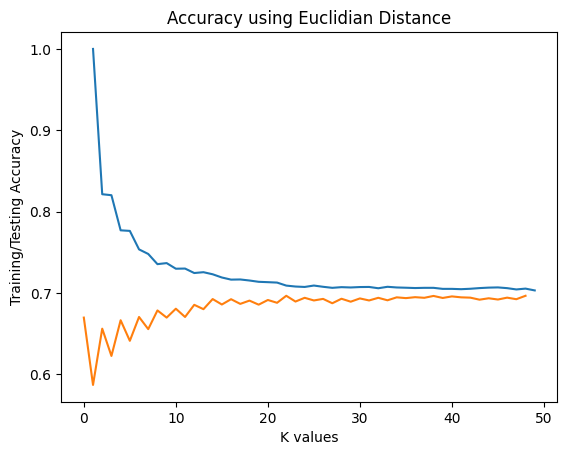

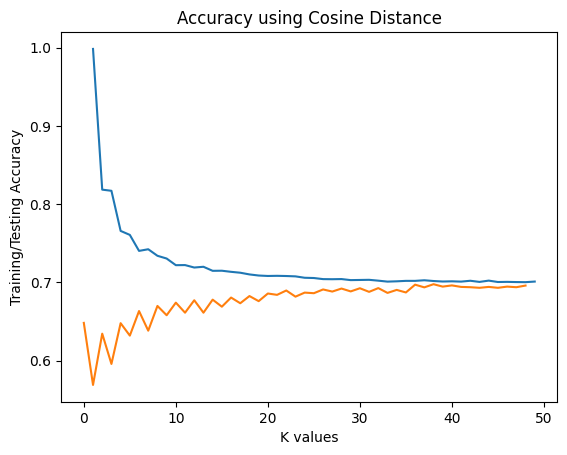

In [14]:
# plotting the accuracies of the testing and training phases
plt.plot(k_values, training_accuracy_euclid, testing_accuracy_euclid)
plt.xlabel('K values')
plt.ylabel('Training/Testing Accuracy')
plt.title('Accuracy using Euclidian Distance')
plt.show()

plt.plot(k_values, training_accuracy_cosine, testing_accuracy_cosine)
plt.xlabel('K values')
plt.ylabel('Training/Testing Accuracy')
plt.title('Accuracy using Cosine Distance')
plt.show()

## 8 | Running the Model with Ideal Parameters
---
We now run the model with the ideal parameters, where we find that in order to get the optimal performance of the model, we need to set the value of K to 45, and have our distance metric set as `euclidean`.

In [15]:
# final run with Chosen Parameters
accs = run_knn_metrics(X_train, y_train, X_test, y_test, k = 45, dm = 'euclidean')
print('Accuracy of K-NN classifier on training set: {:.2f}'
         .format(accs[0]))
print('Accuracy of K-NN classifier on test set: {:.2f}'
         .format(accs[1]))

[[ 139 1417]
 [ 183 3481]]
Accuracy of K-NN classifier on training set: 0.71
Accuracy of K-NN classifier on test set: 0.69


## 9 | Why These Parameters?
---
We chose these parameters as they were the best in terms of distance between the training and testing accuracy. However the accuracy values themselves are not very good.

## 10 | Conclusions
---
It would seem that a KNN is not a good machine learning algorithm for predicting bankruptcy. The algorithm could not reach above a 70 on the training data. Some potential limitations are that there are many reasons behind why a company goes bankrupt, A potential change would be to use more of the features from the dataset instead of just two from the dataset. It may also be good to use a different type of accuracy such as sensitivity as even with undersampling, the overall accuracy is still not very good.

# Using K-Means with Company Bankruptcy By Vinny & Salvin
Welcome to the Jupyter Notebook on K Means! We will be using a dataset for bankruptcy prediction related to US public companies listed on the New York Stock Exchange and NASDAQ.

- **Author:** Vincenzo Bean & Salvin Chowdhury
- **Affiliation:** Milwaukee School of Engineering  
- **Email:** beanv@msoe.edu & chowdhuryj@msoe.edu
- **Date:** 12/13/2024

### All Necessary Imports
The cell below runs a list of all the neccessary imports needed in order to run the code on this Jupyter Notebook as follows:

In [16]:
# all necessary imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 1 | Research Question & Hypothesis
---
How well can a K means clustering algorithm group bankrupted and non bankrupted companies using the entire chosen data set. We believe that the K means with a K value of 2, which matches the number of labels, will achive a 89% using metrics such as the homogeneity score.

## 2 | Data Preprocessing
---
The data preprocessing will be very similar to the KNN preprocessing, just using all of the numerical data rather than two specific columns. The standardization method we will use for K-means will be min max normalization to see if the method of standardization will have an affect on the accuracy. We will also use one-hot encoding to convert the status labels to either 0 or 1. We also will do undersampling to make sure that the dataset is even.

In [17]:
# the outlier plot and checking for null values was previously done, so this will be skipped as we head to preprocessing
df.drop('company_name', axis = 'columns', inplace=True)
labels = df['status_label']
df.drop("status_label", axis = "columns",inplace = True)

### Min-Max Normalization
Next, we perform the min-max normalization where we scale the numerical data to a range of between 0 to 1, which allows us to ensure that all the numerical features in our dataset have have the same range and scale.

In [18]:
# performing min-max scaling
min_max_df = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [19]:
# 1 if the company is alive and 0 if the company is bankrupted
labels = labels.apply(lambda x: 1 if x == 'alive' else (0 if x =='failed' else x))

In [20]:
# counting all the labels
labels.value_counts()

status_label
1    73462
0     5220
Name: count, dtype: int64

In [21]:
# assinging the new labels to the labels column
min_max_df['labels'] = labels

In [22]:
# dropping the year column
min_max_df.drop('year', axis = 'columns', inplace=True)

In [23]:
# extracting the alive and failed rows from the dataframe separately
alive_min_max = min_max_df[min_max_df['labels'] == 1]
failed_min_max = min_max_df[min_max_df['labels'] == 0]

In [24]:
# printing out the size of the failed dataframe
print(failed_min_max.size)
print(min_max_df.size)

99180
1494958


In [25]:
# combining both the alive and final dataframes
alive_min_max = min_max_df.sample(n = failed_min_max.size, replace = True)
final_min_max = pd.concat([alive_min_max, failed_min_max], ignore_index = True)
final_min_max.head()

,Current_assets,Cost_of_goods_sold,Depreciation_and_Amortization,Financial_Performance,Inventory,Net_Income,Total_Receivables,Market_Values,Net_Sales,Total_Assets,Total_longTerm_Debt,EBIT,Gross_profit,Current_Liabilities,Retained_Earnings,Total_Revenue,Total_Liabilities,Operation_Costs,labels
0,0.003467,0.005787,0.004959,0.214369,0.000713,0.485026,0.005513,0.000899,0.009503,0.004660,1.830297e-03,0.268438,0.142770,0.004720,0.201454,0.009503,0.004270,0.006078,1
1,0.000228,0.001152,0.000140,0.211507,0.000297,0.484987,0.000174,0.000008,0.003976,0.000112,8.460751e-05,0.266795,0.135830,0.000126,0.202914,0.003976,0.000167,0.000802,1
2,0.000529,0.001052,0.002700,0.212712,0.000000,0.485027,0.000335,0.000320,0.004158,0.001490,2.358105e-03,0.267331,0.136653,0.000451,0.203044,0.004158,0.001495,0.000736,1
3,0.000261,0.001168,0.000284,0.211746,0.000094,0.485034,0.000170,0.000150,0.004051,0.000408,1.658767e-04,0.267007,0.136033,0.000338,0.203171,0.004051,0.000262,0.000830,1
4,0.000097,0.001004,0.000005,0.211373,0.000075,0.484923,0.000019,0.000006,0.003851,0.000017,2.285714e-07,0.266691,0.135773,0.000018,0.202898,0.003851,0.000008,0.000697,1


# 3 | Experiment Design
---
We split the training data using the train test split method, which uses the holdout method. The hyperparameter tuning will involve us using the Silhouette Coefficient to find the optimal value for K. We chose this method since it combines both between clusters sum of squares and Within clusters sum of squares. The accuracy we will be testing is the homogenuity score since we are experimenting to see how well the model can classify if a business went bankrupt or not.

### Splitting the Dataset
We start off by splitting the dataset into training and testing sets. 70% of our entire dataset will be dedicated towards training the model, and 30% of our dataset will be dedicated towards testing the model. Here is the code as such:

In [26]:
# dropping the target variable
X = final_min_max.drop('labels', axis=1)

# setting up y as the target variable
y = final_min_max['labels']

In [27]:
# performing the splitting of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 4 | Building & Evaluating the KMeans
---
Next up, we build our KMeans model and run the clustering process. Next, we evaluate the clustering performance by finding the Silhouette Scores. The Silhouette score is a way to assess how well the data points are grouped within their clusters and how well the data points are grouped within their clusters. 

### Performing KMeans Clustering
Next up, we perform the KMeans Clustering on the training data. This is bein done so that we can conduct a analysis of the clusters by examining the top features in each cluster to identify the patterns in the data.

In [28]:
# initializing the KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=42)

In [29]:
# performing the clustering
training_labels = kmeans.predict(X_train)
testing_labels = kmeans.predict(X_test)

### Evaluation of the Clustering
At the conclusion of our clustering, we now move on to finding Silhouette scores. The silhouette score ranges from -1 to 1, where a score close to 1 is a great indication that clusters are well separated. A score close to -1 is a indication that data points may have been assigned to the wrong cluster.

In [30]:
# calculating the silhouette scores
train_silhouette = silhouette_score(X_train, training_labels)
test_silhouette = silhouette_score(X_test, testing_labels)

# printing out the silhouette scores
print(f"Train Silhouette Score: {train_silhouette:.2f}")
print(f"Test Silhouette Score: {test_silhouette:.2f}")

Train Silhouette Score: 0.91
Test Silhouette Score: 0.91


## 4 | Hyperparameter Tuning & Evaluation
---
Now, we move on to perform hyperparameter tuning. In hyperparmaeter tuning, we adjust different hyperparameters while keeping the others constant, to see which hyperparamters are the best.

### Number of Clusters
One of the hyperparamters that we're interested in is experimenting with the number of clusters, and we decided that we would experiment with the number of clusters ranging from 2 to 8, and see which number of clusters will

In [31]:
# the different number of clusters
n_clusters_range = [2, 3, 4, 5, 6, 7, 8]

# for looping through the numbers of lusters
for n_clusters in n_clusters_range:
    
    # initializaing the kmeans
    kmeans = KMeans(
        n_clusters=n_clusters,
        random_state=42
    )

    # fitting the model
    kmeans.fit(X_train)

    # performing the predictions
    train_labels = kmeans.predict(X_train)
    test_labels = kmeans.predict(X_test)

    # calculating the silhouette scores
    train_silhouette = silhouette_score(X_train, train_labels)
    test_silhouette = silhouette_score(X_test, test_labels)

    # printing the results
    print(f"n_clusters={n_clusters}")
    print(f"Train Silhouette Score: {train_silhouette:.2f}")
    print(f"Test Silhouette Score: {test_silhouette:.2f}")

n_clusters=2
Train Silhouette Score: 0.96
Test Silhouette Score: 0.97
n_clusters=3
Train Silhouette Score: 0.91
Test Silhouette Score: 0.91
n_clusters=4
Train Silhouette Score: 0.88
Test Silhouette Score: 0.88
n_clusters=5
Train Silhouette Score: 0.87
Test Silhouette Score: 0.87
n_clusters=6
Train Silhouette Score: 0.86
Test Silhouette Score: 0.86
n_clusters=7
Train Silhouette Score: 0.84
Test Silhouette Score: 0.84
n_clusters=8
Train Silhouette Score: 0.84
Test Silhouette Score: 0.83


### Init Types
In KMeans, the init hyperparameter determines how the initial cluster centroids are selected. There are two options which can be used, which are `k-means++` and `random`. Here are how each of them work:
- **k-means++:** this is the default method where the initial centroids are spread out in a way it reduces the chance of poor convergence.
- **random:** with random initialization, centroids are selected randomly from the dataset. The risk can be that if the centroids aren't well spread out, the algorithm may converge to a local minimum.

In [32]:
# the different init types
init_options = ['k-means++', 'random']

# for looping through the init types
for init_value in init_options:
    
    # initializing the kmeans
    kmeans = KMeans(
        init=init_value,
        random_state=42
    )

    # fitting the kmeans model
    kmeans.fit(X_train)

    # performing the predictions
    train_labels = kmeans.predict(X_train)
    test_labels = kmeans.predict(X_test)

    # calculating the silhouette scores
    train_silhouette = silhouette_score(X_train, train_labels)
    test_silhouette = silhouette_score(X_test, test_labels)

    # printing out the results
    print(f"init={init_value}")
    print(f"Train Silhouette Score: {train_silhouette:.2f}")
    print(f"Test Silhouette Score: {test_silhouette:.2f}")

init=k-means++
Train Silhouette Score: 0.84
Test Silhouette Score: 0.83
init=random
Train Silhouette Score: 0.79
Test Silhouette Score: 0.79


### Running the Model with Best Hyperparameters
After performing the hyperparameter tuning, it seems that the best hyperparameters to use are setting the number of clusters to 2 and using either `k-means++` or `random` for init. With this in mind, we now run the model with them.

In [33]:
# initializing the kmeans and fitting the model
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(X_train)

# performing the predictions
training_labels = kmeans.predict(X_train)
testing_labels = kmeans.predict(X_test)

# calculating the silhouette scores
train_silhouette = silhouette_score(X_train, training_labels)
test_silhouette = silhouette_score(X_test, testing_labels)

# finding the homogeneity scores
train_homogeneity = homogeneity_score(y_train, training_labels)
test_homogeneity = homogeneity_score(y_test, testing_labels)

# printing the homogeneity and silhouette scores
print(f"Train Silhouette Score: {train_silhouette:.2f}")
print(f"Test Silhouette Score: {test_silhouette:.2f}")

print(f"Train Homogeneity Score: {train_homogeneity:.2f}")
print(f"Test Homogeneity Score: {test_homogeneity:.2f}")

Train Silhouette Score: 0.96
Test Silhouette Score: 0.97
Train Homogeneity Score: 0.00
Test Homogeneity Score: 0.00


### Displaying the Clusters
Next, we move on to displaying the clusters. As we have 18 dimensions, we would like to reduce it to two dimensions using PCA 

In [34]:
# displaying all the dimensions of the data
print(f"Training data dimensions: {X_train.shape}")
print(f"Testing data dimensions: {X_test.shape}")

Training data dimensions: (73080, 18)
Testing data dimensions: (31320, 18)


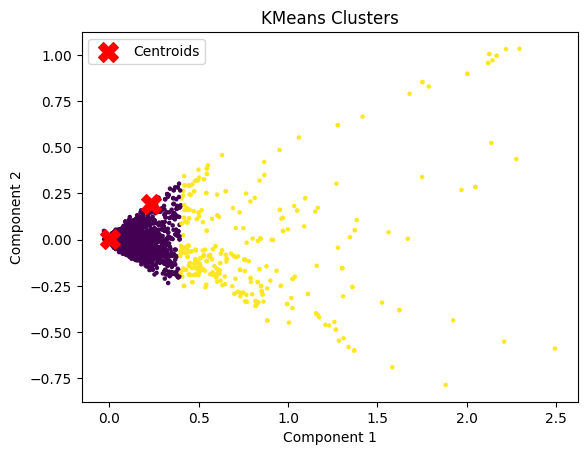

In [35]:
# reducing the dimensions of the dataset to two
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

# visualizing the training clusters
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=training_labels, cmap='viridis', s=5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

# displaying the graph
plt.title("KMeans Clusters")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.show()

### KMeans Clustering Evaluation on Silhouette & Homogeneity Scores
With the final scores of the Silhouette Score being 0.96 for both training and testing, we can confidently say that the quality of the clustering is perfect as the score is close to 1, as this indicates that the score is close to 1.

## 5 | Overall Conclusion
---
As we reach the last part of the KMeans section, we take a look at the results of the performance of the KMeans Clustering and make conclusions as to why it performed the way it did, and what could be done to improve the performance. 

### Limitations of the KMeans Clustering
Despite a high silhouette score for the testing stage, there are some potential limitations that are worth discussing here as follows:
- **Outlier Sensitivity:** KMeans is highly sensitive to outliers because as the KMeans minimizes the sum of the squared distances between centroids, outliers can disproportionately influence the cluster centroids.
- **Clustering with Numerical Data:** KMeans is meant to work with numerical data. Any form of categorical data will need to be one hot encoded or converted into some form of numerical data. This means there is a need for data preprocessing.

### Answering Our Research Question & Hypothesis 
To answer our research question and hypothesis, while KMeans achieved a high Silhouette score, the zero homogeneity score highlights that the clusters don't align with the true bankruptcy values. This means that the KMeans might not be the best model for identifying bankrupted vs non-bankrupted companies in the dataset.

We achieved a homogeneity score of 0, because accoridng to the graph above, it appears that the centroids are in the same cluster, normally a homogeneity score of zero indicates all of the data in one cluster, however the graph shows two different colors for the datapoints. This means that there are two custers, but a majority of the data points in cluster 1 are stacked right on top of the other cluster. THis would also result in a homogenity score of 0 as well, since all of the clusters have overlapping datapoints. Given our experiment, it would appear that KMeans is not the best algorithm to use for this dataset. Instead of using all of the features, we can use maybe 2 or 3 as to avoid overloading the algorithm.

# Using Artificial Neural Networks with Company Bankruptcy By Salvin
Welcome to the Jupyter Notebook on Artificial Neural Networks! We will be using a dataset for bankruptcy prediction related to US public companies listed on the New York Stock Exchange and NASDAQ.

- **Author:** Salvin Chowdhury 
- **Affiliation:** Milwaukee School of Engineering  
- **Email:** chowdhuryj@msoe.edu  
- **Date:** 12/13/2024

### All Necessary Imports
The cell below runs a list of all the neccessary imports needed in order to run the code on this Jupyter Notebook as follows:

In [36]:
%%capture 
!pip install imbalanced-learn==0.9.0
!pip install tqdm

In [38]:
# all necessary imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from tqdm.keras import TqdmCallback
from IPython.display import display, Math

# sklearn imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import class_weight

# tensorflow imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# keras imports
from tqdm.keras import TqdmCallback

# imports for oversampling
from imblearn.over_sampling import RandomOverSampler

## 1 | About the Dataset
---
In this section, we talk about the origins of the dataset, and the features that make up the dataset and why they're important to us. We also talk about how we divide up the dataset for the training and testing phases for our ANN model.


### Design of the Dataset
This dataset is designed about for predicting bankruptcy in American Public Companies that are listed on the NYSE or NASDAQ. It includes financial data from from 8,262 companies, covering the years 1999 to 2018. 

### Division of the Dataset
The dataset contains 78,862 records, representing annual data for each company. Each record is labeled as "Bankruptcy" (1) if the company went bankrupt in the following year, or "Normal" (0). The data is divided into 3 parts:
- **Training Data** (1999 to 2011): used to train predictive models
- **Validation Data** (2012 to 2014): used to fine-tune models
- **Testing Data** (2015 to 2018): used to evaluate how well the model performs on unseen data

### Arrangement of the Dataset
The dataset contains the following information with regards to the column headings and what they actually mean. Here are the descriptions as follows:
1. **Company Name:** this is the name of the company that is listed publicly on the NYSE or NASDAQ
2. **Status_Label:** this is whether the company is alive or if it has failed. 
3. **Year:** this is the year that the company had declared bankruptcy
4. The rest of the column headings are financial data related to current assets, goods sold, depreciation and etc.

**Link to Dataset:** https://www.kaggle.com/datasets/utkarshx27/american-companies-bankruptcy-prediction-dataset

In [40]:
%%capture

# updating setuptools, pip and importlib-metadata
!pip install --upgrade pip setuptools wheel
!pip install --upgrade importlib-metadata

# pip installing kaggle
!pip install kaggle

In [41]:
# importing the kaggle api
from kaggle.api.kaggle_api_extended import KaggleApi

# authenticating the kaggle api
api = KaggleApi()
api.authenticate() 

OSError: Could not find kaggle.json. Make sure it's located in /home/beanv/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/

In [42]:
# retrieving file path of current directory
current_directory = os.getcwd()

# installing the dataset into the current directory
api.dataset_download_files('utkarshx27/american-companies-bankruptcy-prediction-dataset', 
                           path=current_directory, unzip=True)

NameError: name 'api' is not defined

In [ ]:
# reading the .csv file as a pandas data frame
bankruptcy_df = pd.read_csv("american_bankruptcy.csv")

# displaying the dataframe
bankruptcy_df

## 2 | Research Question & Hypothesis
---
Here we discuss what kind of financial dataset that we're dealing with, the details of it, as well as developing a research quetion and a hypothesis along with it to set the tone of the entire Jupyter Notebook.


### Background Explanation
For this Jupyter Notebook project, we are dealing with financial data relating to the bankruptcy of US companies publicly listed on the NYSE or NASDAQ. As we analyse through the financial data, we are making an attempt to create a model that predicts if a company is going to go bankrupt or not. 

### Developing a Research Question
With the background explanation in mind, here is the research question that we have in mind which sets the tone for this Jupyter Notebook and the next following operations. 

```
What is the predictive accuracy of an artificial neural network in identifying bankruptcy risk in American Public Companies using historical financial data?
```

### Developing a Hypothesis
With the research question developed, we want to develop a hypothesis, which is a educated guess on how the ANN model we develop will perform. Here is the hypothesis stated as follows:
```
It is hypothesized that a artificial neural network will achieve a high accuracy for predicting risk of bankruptcy due  to its ability to learn complex, non-linear relationships in financial data
```


In [ ]:
# confirming that the dataset has complex, non-linear relationships
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=bankruptcy_df, x='year', y='X1', hue='X1')
plt.title("Scatter Plot of X1 vs Year")
plt.xlabel("Year")
plt.ylabel("X1")
plt.show()

## 3 | Data Preprocessing 
---
In this stage, we perform the necessary data processing. The following things we do here is check the data types, ensure there are no missing values as well as perform z-score normalization to prevent any of the features from being too dominant

### Data Type Checking & Handling Missing Values
We would like to ensure that we're aware of the type of data that we're handling. This means knowing the data types and confirming that our assumptions are true. We achieve this by doing `.dtypes`

Next, we perform a check to see if there are any missing values within our dataset. We would like to ensure that there is none, so that our next stages in the Jupyter Notebook aren't affected, and handle any missing values if there are any.

In [ ]:
# checking the information about the dataframe
bankruptcy_df.info()

### Outlier Detection & Treatment
Outlier detection and treatment is crucial for ensuring the quality and reliability of the dataset, especially in financial data where outliers can distort analyses or models like ANNs. We can check for outliers using the boxplot.

In [ ]:
# box plotting selected columns
plt.figure(figsize=(14, 8))
sns.boxplot(data=bankruptcy_df.select_dtypes(include='number'))
plt.title("Boxplots for All Numeric Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

It appears that there are outliers within our dataset. The sources of outliers can be of different reasons, such as a data entry error. To be on the safe side, we can remove these outliers and justify it in our final conclusion.

In [ ]:
Q1 = bankruptcy_df['X1'].quantile(0.25)
Q3 = bankruptcy_df['X1'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = bankruptcy_df[(bankruptcy_df['X1'] >= lower_bound) & (bankruptcy_df['X1'] <= upper_bound)]
filtered_df

### Normalization and Standardization
Neural networks are sensitive to the scale of input features. Features with larger ranges can dominate the learning process, leading to slower convergence. With regards to the current dataset, the negative values are meaningful, and should be preserved relative to the mean. 

With this in mind, we perform z-score scaling, where we center the data around a mean of 0, and scale it to have a standard deviation of 1. It is also preferred by ANN's to have standardized data.

In [ ]:
# selecting all numerical features
numerical_features_df = bankruptcy_df.iloc[:, 3:]

# initializing the standard scaler
scaler = StandardScaler()

# transforming the features
scaled_features = scaler.fit_transform(numerical_features_df)

# creating a new dataframe with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features_df.columns)

# updating the original bankruptcy 
bankruptcy_df.iloc[:, 3:] = scaled_df

# viewing the new bankruptcy dataframe
bankruptcy_df

We would like to ensure that the numerical features in the bankruptcy dataset are scaled properly. In order to do that, we calculate the mean and standard deviation of the features as such in the cell below using `.mean()` and `.std()`.

In [ ]:
# calculating the mean of the numerical features
print(scaled_df.mean())  

# calculating the standard deviation of the numerical features
print(scaled_df.std())  

### Binary Classification
Binary Classification is a type of machine learning task where the goal is to classify data into one of two possible categories. We would like to perform binary classification on the `status_label` column, which only contains two distinct values, which are `alive` and `failed`. 

In [ ]:
# performing the binary classification
bankruptcy_df['status_label'] = bankruptcy_df['status_label'].map({'alive': 0, 'failed': 1})

## 4 | Machine Learning Model Experiment & Design
---

In this section, we outline the steps that will be taken to create the artificial neural network model, how the dataset  will be split and how the hyperparmaters will be accounted for to ensure we get the best performance out of the model.

### Splitting the Dataset
We start off by splitting the dataset into training and testing sets. 70% of our entire dataset will be dedicated towards training the model, and 30% of our dataset will be dedicated towards testing the model. Here is the code as such:

In [ ]:
# dropping the target variable
X = bankruptcy_df.drop('status_label', axis=1)

# setting up y as the target variable
y = bankruptcy_df['status_label']

In [ ]:
# splitting the dataset where 30% is dedicated towards testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train = X_train.drop(columns=['company_name', 'year'])
X_test = X_test.drop(columns=['company_name', 'year'])

### Resampling the Dataset
The dataset is highly imbalanced. There are 93% of instances where the publicly traded company is alive and 7% of instances where the publicly traded company is not. This imbalance leads to issues where the model becomes biased towards the majority class. To deal with this problem, we oversample the imbalanced dataset.

In [ ]:
# initializing the over sampler
oversampler = RandomOverSampler(random_state=42)

# balancing the classes by oversampling the minority class
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

### Building the Artificial Neural Network Model
We now build our Artificial Neural Network model. We achieve this by creating a sequential model with different layers, such as a dense layer and a dropout layer. We then compile the model and use progress bars to track the progress of the model being trained.

In [ ]:
# function for the artificial neural network model
def ANN(X_train, y_train, X_test, y_test, hidden=16, epochs=5, dropout=0.5, activation_function='relu'):
    
    # computing the class weights
    class_weights = class_weight.compute_class_weight(
        'balanced', classes=np.unique(y_train), y=y_train
    )
    class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
    
    # initializing the model
    model = Sequential()
    
    # adding layers to the model
    model.add(Flatten())
    model.add(Dense(hidden, activation=activation_function))
    model.add(Dropout(dropout))
    model.add(Dense(hidden, activation=activation_function))
    
    model.add(Dense(1, activation='sigmoid'))
    
    # compiling the model
    model.compile(loss="binary_crossentropy",
                  optimizer='adam',
                  metrics=['accuracy'])
    
    # performing early stops
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    # setting up a progress bar
    tqdm_callback = TqdmCallback(verbose=1)
    
    # training the model
    history = model.fit(x=X_train.values, y=y_train.values,
                        validation_data=(X_test.values, y_test.values),
                        batch_size=16, epochs=epochs,
                        class_weight=class_weights_dict,
                        verbose=0,
                        callbacks=[tqdm_callback])
    
    # the accuracy on the training set
    predicted_probabilities = model.predict(X_train)
    predicted_probabilities = np.rint(predicted_probabilities)
    train_accuracy = accuracy_score(y_train, predicted_probabilities)
    acc = 100. * accuracy_score(y_train, predicted_probabilities)
    print("Accuracy on train set: {:.2f}%".format(acc))
    
    # accuracy on the testing set
    predicted_probabilities = model.predict(X_test)
    predicted_probabilities = np.rint(predicted_probabilities)
    test_accuracy = accuracy_score(y_test, predicted_probabilities)
    acc = 100. * accuracy_score(y_test, predicted_probabilities)
    print("Accuracy on test set: {:.2f}%".format(acc))
    
    # printing the confusion matrix
    print(confusion_matrix(y_test, predicted_probabilities))
    
    # returning the accuracy values and the history
    return train_accuracy, test_accuracy, history

### Running the Artificial Neural Network Model
With the Artificial Neural Network Model all set up, we can now run it and see how well the model performs. Next, we will perform hyperparameter tuning to see which hyperparameters are the best for getting the best performance out of the model.

In [ ]:
warnings.filterwarnings('ignore')

# running the ANN model
train_acc, test_acc, history = ANN(X_resampled, y_resampled, X_test, y_test, hidden=16, epochs=5, dropout=0.5, 
                                   activation_function='relu')

# Plotting accuracy
plt.plot(history.history['acc'], label='Train Accuracy')  # 'acc' is used for training accuracy
plt.plot(history.history['val_acc'], label='Validation Accuracy')  # 'val_acc' is used for validation accuracy
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

## 5 | Performing Hyperparameter Tuning
---
Next up, we perform hyperparameter tuning. In the cells below, we perform tests on the model on a range of hyperparameters such as number of neurons, dropout rate, type of activation functions and number of epochs.

### Activation Functions
We start by experimenting with the model with three different activation functions:
- **Relu (Rectified Linear Unit):**  the most commonly used activation function in deep learning models. It outputs the input directly if it is positive, otherwise, it outputs zero. 
- **Sigmoid:** The sigmoid function squashes the input into a range between 0 and 1, making it particularly useful for binary classification tasks.
- **Tanh (Hyperbolic Tangent):** Tanh is a scaled version of the sigmoid function, which outputs values between -1 and 1. It has a similar shape to the sigmoid but is zero-centered, which can help with training since it makes the data distribution more balanced.

In [ ]:
# list of activation functions
activation_functions = ['relu', 'sigmoid', 'tanh'] 

# creating 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# looping throught the different activation functions
for i, activation_function in enumerate(activation_functions):
    
    # re-running the ANN model
    train_acc, test_acc, history = ANN(X_resampled, y_resampled, X_test, y_test, hidden=16, epochs=5, 
                                       dropout=0.5, activation_function=activation_function)
    
    # plotting the accuracies
    axes[i].plot(history.history['acc'], label='Train Accuracy')  
    axes[i].plot(history.history['val_acc'], label='Testing Accuracy')  
    axes[i].set_title(f'Accuracy ({activation_function})')
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend(loc='upper left')

# displaying the plot
plt.tight_layout()
plt.show()

### Epochs
Next, we experiment with the model with different number of epochs. A epoch refers to a complete passing through the entire training dataset. During an epoch, the model learns from the data by making predictions.

In [ ]:
# list of different epoch values
epochs_list = [5, 10, 15]

# making a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# looping through the epoch values
for i, epochs in enumerate(epochs_list):
    
    # running the ANN model
    train_acc, test_acc, history = ANN(X_resampled, y_resampled, X_test, y_test, hidden=16, epochs=epochs, 
                                       dropout=0.5, activation_function='relu')
    
    # plotting the accuracies
    axes[i].plot(history.history['acc'], label='Train Accuracy')  # 'acc' is used for training accuracy
    axes[i].plot(history.history['val_acc'], label='Testing Accuracy')  # 'val_acc' is used for validation accuracy
    axes[i].set_title(f'Accuracy ({epochs} Epochs)')
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend(loc='upper left')

# displaying the plots
plt.tight_layout()
plt.show()

### Neurons
Next, we train the model using different numbers of neurons. Neurons are the computational units that transform the inputs they receive, based on their weights and activation functions.

In [ ]:
# displaying the number of neurons
neurons_list = [8, 16, 32] 

# making a figure consisting of 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# looping through the list of hidden neurons
for i, neurons in enumerate(neurons_list):
    
    # running the ANN model
    train_acc, test_acc, history = ANN(X_resampled, y_resampled, X_test, y_test, hidden=neurons, epochs=5, 
                                       dropout=0.5, activation_function='relu')
    
    # plotting the accuracy
    axes[i].plot(history.history['acc'], label='Train Accuracy')  # 'acc' is used for training accuracy
    axes[i].plot(history.history['val_acc'], label='Validation Accuracy')  # 'val_acc' is used for validation accuracy
    axes[i].set_title(f'Accuracy ({neurons} Neurons)')
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend(loc='upper left')

# displaying the plot
plt.tight_layout()
plt.show()

### Dropout 
Lastly, we experiment with different levels of dropout values. Dropout is a regularization technique that randomly deactivates a fraction of neurons during the training process to prevent overfitting.

In [ ]:
# the list of dropout
dropout_list = [0.2, 0.5, 0.8]  

# displaying the 3 subplots to be generated
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# looping through the dropout values
for i, dropout in enumerate(dropout_list):
    
    # running the ANN model
    train_acc, test_acc, history = ANN(X_resampled, y_resampled, X_test, y_test, hidden=16, epochs=5, 
                                       dropout=dropout, activation_function='relu')
    
    # plotting the accuracies
    axes[i].plot(history.history['acc'], label='Train Accuracy')  # 'acc' is used for training accuracy
    axes[i].plot(history.history['val_acc'], label='Test Accuracy')  # 'val_acc' is used for validation accuracy
    axes[i].set_title(f'Accuracy (Dropout {dropout})')
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend(loc='upper left')

# displaying the plot
plt.tight_layout()
plt.show()

### Training the Model with the Best Parameters
Lastly, we train the model with the best parameters to see how well the model performs at making a prediction. 

In [ ]:
# running the final ANN model with the best parameters
train_acc, test_acc, history = ANN(X_resampled, y_resampled, X_test, y_test, hidden=16, epochs=15, dropout=0.5, 
                                   activation_function='relu')

## 6 | Machine Learning Model Evaluation
---

### Confusion Matrix
In order to evaluate just how well the model is performing, we need to look at the model's confusion matrix, precision, recall, F1 score and specificity. 

The results of the confusion matrix from our best performing model is as follows:
- **True Positives (TP):** 747 
- **True Negatives (TN):** 17999
- **False Positives (FP):** 3992
- **False Negatives (FN):** 867

### Calculating the Precision, Recall, F1 Score & Specificity

\begin{aligned}
&\text{Precision:} \quad \text{Precision} = \frac{TP}{TP + FP} \\
&\text{Recall:} \quad \text{Recall} = \frac{TP}{TP + FN} \\
&\text{F1-Score:} \quad \text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} \\
&\text{Specificity:} \quad \text{Specificity} = \frac{TN}{TN + FP}
\end{aligned}

Using the formulas listed above, we get the following results:
- **Precision:** 0.157 (a low precision means that there was a high proportion of incorrect positive predictions)
- **Recall:** 0.463 (this might mean that the model is better at identifying actual positives than false positives)
- **F1-Score:** 0.237 (this means that the model struggles with balancing precision and recall)
- **Specificity:** 0.818 (this means that the model is good at identifying negatives)

## 7 | Overall Conclusion
---
In this last section, we take a look at the results of the perfomance of the artificial neural network model and make conclusions as to why it performed the way it did and what could be done to improve the performance of our model.

### Limitations of the Machine Learning Model
The low precision is a indication that the model struggles a lot with false positives, as it predicts positive cases incorrectly. This may be due to the design of the dataset, as there is a high class imbalance, which leads to a risk in overfitting.

### Answering Research Question & Hypothesis
To answer our research question, the predictive accuracy of our ANN model is 79.42%. To reflect upon our hypothesis, the current model doesn't meet the high accuracy as stated, and there needs to be more improvements made to the model in order to reflect the hypothesis.